# Tabu Search for the Shubert 3 Function

Written by Phyllis Poh (hlpp2), for 4M17 Practical Optimisation, Coursework 2

# Importing Libraries

In [164]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Set the random number generator seed
np.random.seed(0)

# Shubert Functions and Visualisation

For reference, documentation for the Shubert 3 function: http://benchmarkfcns.xyz/benchmarkfcns/shubert3fcn.html?fbclid=IwAR2SjVB0XUwaCTgMZ3GWFlcyTX1OACIn1kLZMgRWSLSA0L21NcVjtWDwUlQ

Shubert 3 function: $f(\mathbf{x})=f(x_1, ...,x_n)=\sum_{i=1}^{n}{\sum_{j=1}^5{j \sin \left((j+1)x_i+j \right)}}$

Global minima for the 2D Shubert 3 funnction: $f(\mathbf{x}^\ast) = −29.6733337$ 

In [165]:
def shubert(x):
    for element in x:
        assert abs(element) <= 2
        
    y = 0
    for i in range(5):
        for j in range(1,6):
            y += j * math.sin((j+1)*x[i] + j)
    return y


def shubert2d(x):
    for element in x:
        #print(element)
        assert abs(element) <= 2
    y = 0
    for i in range(2):
        for j in range(1,6):
            y += j * math.sin((j+1)*x[i] + j)
    return y
        
    
def plot_shubert2d(archive=[], path=[]):
    xvalues = np.linspace(-2,2,200)
    yvalues = np.linspace(-2,2,200)
    xgrid, ygrid = np.meshgrid(xvalues, yvalues)
    zvalues = []

    for x in range(len(xvalues)):
        zvalues.append([])
        for y in range(len(yvalues)):
            zvalues[x].append(shubert2d([xvalues[x],yvalues[y]]))

    zvalues = np.array(zvalues)
    
    x_points = []
    y_points = []
    z_points = []
    x_path = []
    y_path = []
    z_path = []
    
    for entry in archive:
        x_points.append(archive[entry][0])
        y_points.append(archive[entry][1])
        z_points.append(entry)
        
    for entry in path:
        x_path.append(path[entry][0])
        y_path.append(path[entry][1])
        z_path.append(entry)
        
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(1,1,1,projection='3d')
    surf = ax.plot_surface(xgrid, ygrid, zvalues, rstride=5, cstride=5, linewidth=0, cmap=cm.plasma)
    ax.set_title('Surface Plot of 2D Shubert 3 Function', fontsize=18)
    ax.set_xlabel('$x_1$', fontsize=18)
    ax.set_ylabel('$x_2$', fontsize=18)
    ax.set_zlabel('$f(\mathbf{x})$', fontsize=18)
    ax.scatter(x_points, y_points, z_points)
    plt.tight_layout()

    fig2 = plt.figure(figsize=(8,6))
    ax = fig2.add_subplot(1,1,1)
    plt.contour(xgrid, ygrid, zvalues, 20, cmap=cm.plasma)    
    ax.scatter(x_points, y_points)
    if archive != []:
        ax.set_title('Archived Solutions for 2D Shubert 3 Problem', fontsize=18)
    else:
        ax.set_title('Contour Plot of 2D Shubert 3 Function', fontsize=18)
    ax.set_xlabel('$x_1$', fontsize=18)
    ax.set_ylabel('$x_2$', fontsize=18)
    cbar = fig2.colorbar(surf, aspect=18)
    cbar.set_label('$f(\mathbf{x})$', rotation=0, fontsize=18)
    
    z = [min(i) for i in zvalues]
    
    if path != []:
        fig3 = plt.figure(figsize=(8,6))
        ax = fig3.add_subplot(1,1,1)
        plt.contour(xgrid, ygrid, zvalues, 20, cmap=cm.plasma)    
        ax.scatter(x_path, y_path)
        ax.set_title('Tabu Search Search Pattern for 2D Shubert 3 Problem', fontsize=18)
        ax.set_xlabel('$x_1$', fontsize=18)
        ax.set_ylabel('$x_2$', fontsize=18)
        cbar = fig3.colorbar(surf, aspect=18)
        cbar.set_label('$f(\mathbf{x})$', rotation=0, fontsize=18)
        
        fig4 = plt.figure(figsize=(8,6))
        ax = fig4.add_subplot(1, 1, 1)
        plt.plot(z_path)
        plt.xlabel('Iteration', Fontsize=14)
        plt.ylabel('$f(\mathbf{x})$', Fontsize=14)
        plt.title('Objective Reduction for Minimization of 2D Shubert', Fontsize=14)

    
def plot_progress(fx_progress):
    '''Plot the progress of best solution found across number of iterations'''
    plt.figure()
    plt.plot(fx_progress)
    plt.xlabel('Number of Objective Evaluations', Fontsize=14)
    plt.ylabel('$f(\mathbf{x^*})$', Fontsize=14)
    plt.title('Best Solution Found Across Iterations', Fontsize=14)
    
    
def plot_progress2d(fx_progress):
    '''Plot the progress of best solution found across number of iterations
    Compares with global minimum for 2D Shubert function
    '''
    plt.figure()
    plt.plot(fx_progress, label='Tabu Search')
    plt.xlabel('Number of Objective Evaluations', Fontsize=14)
    plt.ylabel('$f(\mathbf{x^*})$', Fontsize=14)
    plt.title('Best Solution Found Across Iterations', Fontsize=14)
    plt.plot(np.ones(len(fx_progress))*-29.6733337, '--', label='Global Minimum')
    plt.legend()

    
def plot_progress_multseed(fx_progress_list, title=None):
    '''Plot the progress of best solution found across number of iterations'''
    plt.figure()
    for seed in range(len(fx_progress_list)):
        plt.plot(fx_progress_list[seed], label=seed)
    plt.xlabel('Number of Objective Evaluations', Fontsize=14)
    plt.ylabel('$f(\mathbf{x^*})$', Fontsize=14)
    if title == None:
        plt.title('Best Solution Found Across Iterations for Various Seeds', Fontsize=14)
    else:
        plt.title(title, Fontsize=14)

# Visualisation of 2D Shubert 3 Function

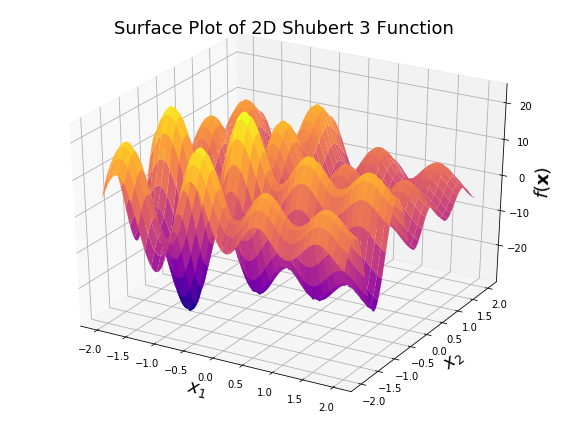

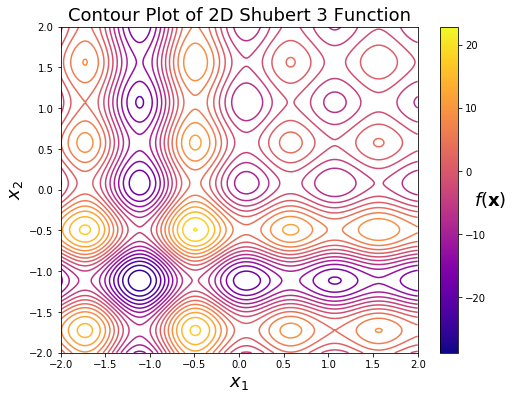

In [166]:
plot_shubert2d()

# General Functions
Functions related to initialisation and archiving

In [167]:
def shotgun_init(f, n):
    """Shotgun Initialisation"""
    best_x = np.zeros(5)
    for i in range(n):
        x = np.zeros(len(best_x))
        for j in range(len(x)):
            x[j] = np.random.uniform(-2, 2)
        if f(x) <= f(best_x):
            best_x = x
    return best_x

def shotgun_init2d(f, n):
    """Shotgun Initialisation"""
    best_x = np.zeros(2)
    for i in range(n):
        x = np.zeros(len(best_x))
        for j in range(len(x)):
            x[j] = np.random.uniform(-2, 2)
        if f(x) <= f(best_x):
            best_x = x
    return best_x

def update_archive(x, f, archive):
    '''Archives the best solution'''
    for fx0 in archive:
        if f(x) < fx0:
            del archive[fx0]
            archive[f(x)] = x
            break
    return archive
    
def feasible_check(x):
    for element in x:
        if abs(element) > 2:
            return False
    return True

# Tabu Search Functions (General)

In [168]:
def arraynotin(x, x_list):
    '''Check if numpy array is present in list of numpy arrays. For housekeeping purposes
    Note: for np.arrays, [x in x_list] returns error'''
    return not any(np.array_equal(x, arr) for arr in x_list)

# Tabu Search Functions (Local Search)

In [169]:
def local_search(x0, f, STM, delta):
    '''Conducts a local search around the area, 
    and makes the best allowed move'''
    dim = len(x0)
    best_x = x0.copy()
    
    for i in range(dim):
        x = x0.copy()
        x[i] += delta
        if feasible_check(x):
            if (f(x) < f(best_x)) and arraynotin(x, STM):
                best_x = x.copy()

        x = x0.copy()
        x[i] -= delta
        if feasible_check(x):
            if (f(x) < f(best_x)) and arraynotin(x, STM):
                best_x = x.copy()
    return best_x

def pattern_move(x0, x_base, f, STM):
    '''Repeats a move vector from the last base point. 
    If this reduces value of objective function further, retain. Else discard.'''
    
    dim = len(x0)
    
    vector = np.zeros(dim)
    
    vector = x0 - x_base
    x = vector + x0
    
    # Check if pattern move reduces value of objective function further
    if feasible_check(x):
        if (f(x) < f(x0)) and arraynotin(x, STM):
            return x
    return x0

def update_STM(x, STM):
    N = 7
    if arraynotin(x, STM):
        if len(STM) < N:
            STM.append(x)
        else:
            STM.pop(0)
            STM.append(x)
    return STM

# Tabu Search Functions (Search Intensification)

In [170]:
def update_MTM(x, f, MTM):
    '''Update Medium Term Memory'''
    M = 4
    if len(MTM) < M:
        MTM[f(x)] = x
    elif f(x) < max([i for i in MTM]):
        del MTM[max([i for i in MTM])]
        MTM[f(x)] = x
    return MTM
    
def search_intensify(MTM):
    '''Search Intensification. 
    Move current search location to average best position'''
    M = len(MTM)
    dim = len(random.choice(list(MTM.items()))[1])
    x = np.zeros(dim)
    for obj in MTM:
        for i in range(len(MTM[obj])):
            x[i] += MTM[obj][i]
    x /= M
    return x

# Tabu Search Functions (Search Diversification)

In [171]:
def init_LTM(x0, sectors):
    dim = len(x0)
    dim_list = []
    for i in range(dim):
        dim_list.append(sectors)
    LTM = np.zeros(dim_list)
    return LTM


def update_LTM(x, LTM):
    sectors = len(LTM)
    sector_length = 4/len(LTM)
    coords = []
    
    # Record the corresponding coordinates of the sectors
    for element in x:
        lower_bound = -2
        upper_bound = lower_bound + sector_length
        for i in range(sectors):
            if element > lower_bound and element < upper_bound:
                coords.append(i)
                break
            lower_bound += sector_length
            upper_bound += sector_length
    
    coords = tuple(coords)
    LTM[coords] += 1
    
    return LTM
    
def search_diversify2d(LTM):
    x = np.zeros(2)
    sector_length = 4/len(LTM)
    coord_list = []
    for row in range(len(LTM)):
        for column in range(len(LTM[row])):
            if LTM[row, column] < 50:
                coord_list.append((row, column))
                
    coord = random.choice(coord_list)
    for i in range(len(x)):
        x[i] = -2 + sector_length * (coord[i] + 1/2)
    return x

def search_diversify(LTM):
    x = np.zeros(5)
    sector_length = 4/len(LTM)
    coord_list = []
    for dim1 in range(len(LTM)):
        for dim2 in range(len(LTM[dim1])):
            for dim3 in range(len(LTM[dim1, dim2])):
                for dim4 in range(len(LTM[dim1, dim2, dim3])):
                    for dim5 in range(len(LTM[dim1, dim2, dim3, dim4])):
                            if LTM[dim1, dim2, dim3, dim4, dim5] < 50:
                                coord_list.append((dim1, dim2, dim3, dim4, dim5))
                
    coord = random.choice(coord_list)
    for i in range(len(x)):
        x[i] = -2 + sector_length * (coord[i] + 1/2)
    return x

# Tabu Search Main Function (Shubert 2D)


Best solution: 
 -29.675886353833477 [-1.11432613 -1.1139339 ]


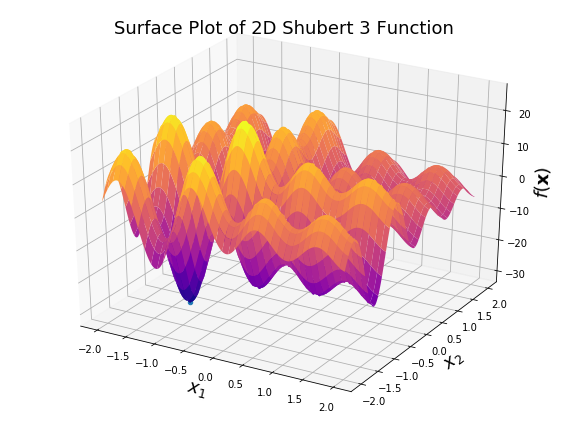

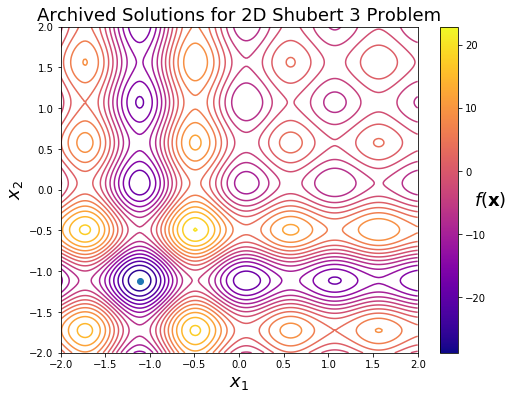

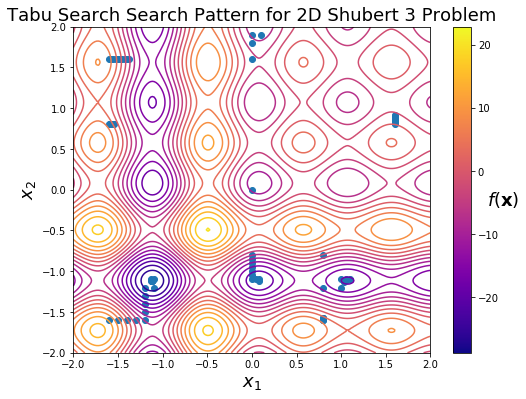

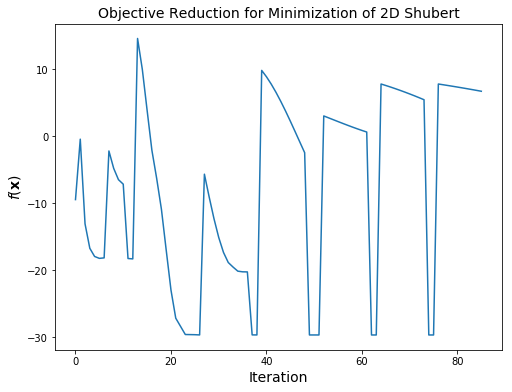

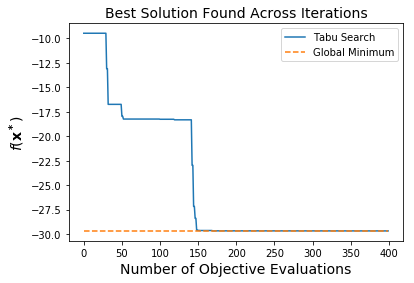

In [172]:
f = shubert2d
intensify = 10
diversify = 15
reduce = 25
delta = 0.2

x0 = shotgun_init2d(f, 5)
fx_progress = []
STM = []
MTM = {}
LTM = init_LTM(x0, 5)
archive = {f(x0): x0}
old_archive = {}
path = {f(x0):x0.copy()}
x_base = x0
x = x0
counter = 0

while delta > 0.001:
    x = local_search(x, f, STM, delta)
    STM = update_STM(x, STM)
    x = pattern_move(x, x_base, f, STM)
    STM = update_STM(x, STM)
    
    MTM = update_MTM(x, f, MTM)
    LTM = update_LTM(x, LTM)
    archive = update_archive(x, f, archive)
    old_archive = archive.copy()
    x_base = x.copy()
    fx_progress.append(min([i for i in archive]))
    
    if min([i for i in archive]) == min([i for i in old_archive]):
        counter += 1
        if counter == intensify:
            x = search_intensify(MTM)
        elif counter == diversify:
            x = search_diversify2d(LTM)
        elif counter == reduce:
            counter = 0
            delta /= 2
            x = archive[min([i for i in archive])]
        STM = []
        MTM = update_MTM(x, f, MTM)
        LTM = update_LTM(x, LTM)
        archive = update_archive(x, f, archive)
        old_archive = archive
        path[f(x)] = x.copy()
        x_base = x.copy()
        fx_progress.append(min([i for i in archive]))

best_sln = min([i for i in archive])
print("\nBest solution: \n", best_sln, archive[best_sln])  

# Draw contour plot and evolution of best solution found across iterations
plot_shubert2d(archive, path)
plot_progress2d(fx_progress)

# Tabu Search Main Function (Shubert 2D, Varying Random Seeds)

Best solution found: -29.675886353833484


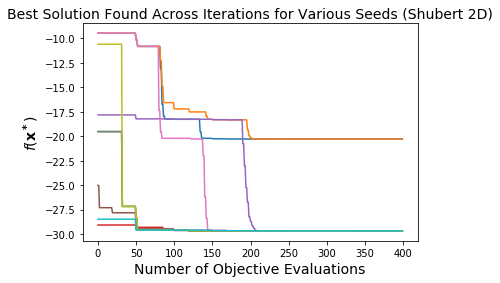

In [173]:
f = shubert2d
intensify = 10
diversify = 15
reduce = 25
fx_progress_list = []

for seed in range(10):
    np.random.seed(seed)
    delta = 0.2
    x0 = shotgun_init2d(f, 5)
    fx_progress = []
    STM = []
    MTM = {}
    LTM = init_LTM(x0, 5)
    archive = {f(x0): x0}
    old_archive = {}
    path = {f(x0):x0.copy()}
    x_base = x0
    x = x0
    counter = 0

    while delta > 0.001:
        x = local_search(x, f, STM, delta)
        STM = update_STM(x, STM)
        x = pattern_move(x, x_base, f, STM)
        STM = update_STM(x, STM)

        MTM = update_MTM(x, f, MTM)
        LTM = update_LTM(x, LTM)
        archive = update_archive(x, f, archive)
        old_archive = archive.copy()
        x_base = x.copy()
        fx_progress.append(min([i for i in archive]))

        if min([i for i in archive]) == min([i for i in old_archive]):
            counter += 1
            if counter == intensify:
                x = search_intensify(MTM)
            elif counter == diversify:
                x = search_diversify2d(LTM)
            elif counter == reduce:
                counter = 0
                delta /= 2
                x = archive[min([i for i in archive])]
            STM = []
            MTM = update_MTM(x, f, MTM)
            LTM = update_LTM(x, LTM)
            archive = update_archive(x, f, archive)
            old_archive = archive
            path[f(x)] = x.copy()
            x_base = x.copy()
            fx_progress.append(min([i for i in archive]))
            
    fx_progress_list.append(fx_progress)

    
# Evolution of best solution found across iterations for random seeds
print("Best solution found:", np.min([arr[-1] for arr in fx_progress_list]))
plot_progress_multseed(fx_progress_list, 'Best Solution Found Across Iterations for Various Seeds (Shubert 2D)')

# Tabu Search Main Function (Shubert 5D)

Best solution found: -64.8030242352046


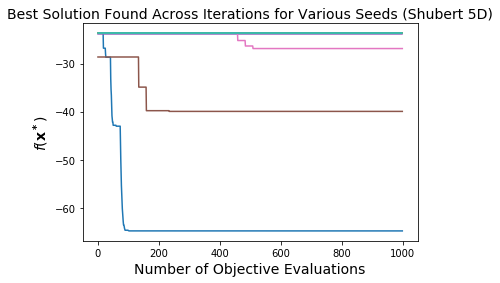

In [174]:
def tabu_search(delta=0.2,delta_red=2, div_num=1):
    f = shubert
    intensify = 10
    
    diversify = []
    div = 15
    for i in range(div_num):
        diversify.append(div)
        div += 10
    reduce = 25 + (div_num-1)*10
    
    fx_progress_list = []

    for seed in range(10):
        np.random.seed(seed)
        x0 = shotgun_init(f, 5)
        fx_progress = []
        STM = []
        MTM = {}
        LTM = init_LTM(x0, 5)
        archive = {f(x0): x0}
        old_archive = {}
        path = {f(x0):x0.copy()}
        x_base = x0
        x = x0
        counter = 0
        cycle = 0

        while cycle < 1000:
            cycle += 1
            x = local_search(x, f, STM, delta)
            STM = update_STM(x, STM)
            x = pattern_move(x, x_base, f, STM)
            STM = update_STM(x, STM)

            MTM = update_MTM(x, f, MTM)
            LTM = update_LTM(x, LTM)
            archive = update_archive(x, f, archive)
            old_archive = archive.copy()
            x_base = x.copy()

            if min([i for i in archive]) == min([i for i in old_archive]):
                counter += 1
                if counter == intensify:
                    x = search_intensify(MTM)
                elif counter in diversify:
                    x = search_diversify(LTM)
                elif counter == reduce:
                    counter = 0
                    delta /= delta_red
                    x = archive[min([i for i in archive])]
                STM = []
                MTM = update_MTM(x, f, MTM)
                LTM = update_LTM(x, LTM)
                archive = update_archive(x, f, archive)
                old_archive = archive
                path[f(x)] = x.copy()
                x_base = x.copy()
            fx_progress.append(min([i for i in archive]))
            
        fx_progress_list.append(fx_progress)  
        
    return fx_progress_list

fx_progress_list = tabu_search(delta_red=2)
print("Best solution found:", np.min([arr[-1] for arr in fx_progress_list]))
plot_progress_multseed(fx_progress_list, 'Best Solution Found Across Iterations for Various Seeds (Shubert 5D)')

# Performance Investigations
## Performance Measure
Best solution after 1000 objective function evaluations made, averaged across 10 random seeds


## Possible Parameters To Vary:
### Step reduction rate
Factor $\beta$ to multiply step size by during reduction stage

### Starting Step Size
Initial $\delta_0$

### Search Diversification
Number of times to run search diversification before reducing step size
Note: Search diversification sectors divided according to initial step size?

## Investigation 1: Step Reduction Rate

In [175]:
delta_red_var = np.linspace(1, 10, 100)
best_x_avg = []

for delta_red in delta_red_var:
    fx_progress_list = tabu_search(delta_red=delta_red)
    progress_list = [arr[-1] for arr in fx_progress_list]
    avg = np.average(progress_list)
    best_x_avg.append(avg)

Average best solution: -24.65402112961567
Best solution found: -28.631542597820314


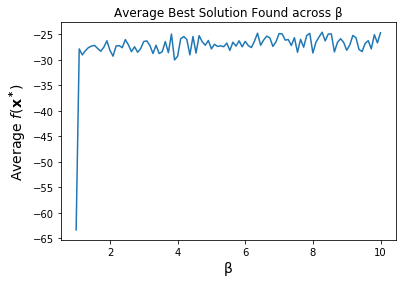

In [176]:
plt.plot(delta_red_var, best_x_avg)
plt.xlabel('β', Fontsize=14)
plt.ylabel('Average $f(\mathbf{x^*})$', Fontsize=14)
plt.title('Average Best Solution Found across β')
print("Average best solution:", np.average([arr[-1] for arr in fx_progress_list]))
print("Best solution found:", np.min([arr[-1] for arr in fx_progress_list]))

In [177]:
delta_red_var = np.linspace(1, 2.5, 100)
best_x_avg = []

for delta_red in delta_red_var:
    fx_progress_list = tabu_search(delta_red=delta_red)
    progress_list = [arr[-1] for arr in fx_progress_list]
    avg = np.average(progress_list)
    best_x_avg.append(avg)

Average best solution: -26.01686176896059
Best solution found: -39.48930151412734


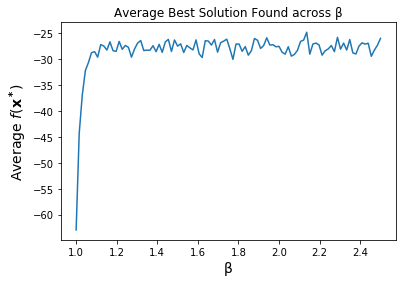

In [178]:
plt.plot(delta_red_var, best_x_avg)
plt.xlabel('β', Fontsize=14)
plt.ylabel('Average $f(\mathbf{x^*})$', Fontsize=14)
plt.title('Average Best Solution Found across β')
print("Average best solution:", np.average([arr[-1] for arr in fx_progress_list]))
print("Best solution found:", np.min([arr[-1] for arr in fx_progress_list]))

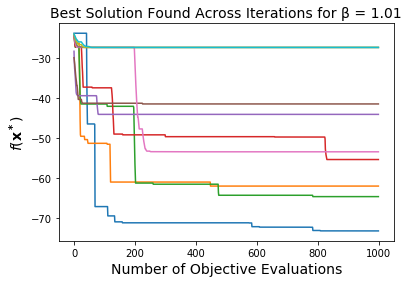

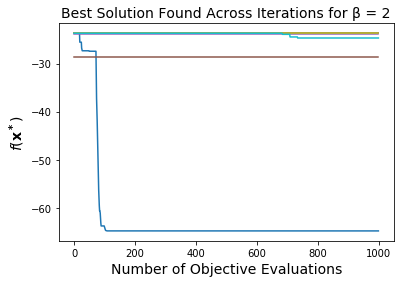

In [179]:
fx_progress_list = tabu_search(delta_red=1.01)
plot_progress_multseed(fx_progress_list, 'Best Solution Found Across Iterations for β = 1.01')

fx_progress_list = tabu_search(delta_red=2)
plot_progress_multseed(fx_progress_list, 'Best Solution Found Across Iterations for β = 2')

## Investigation 2: Starting Step Size

In [180]:
delta_var = np.linspace(0.1, 2, 100)
best_x_delta = []

for delta in delta_var:
    fx_progress_list = tabu_search(delta=delta, delta_red=1.01)
    progress_list = [arr[-1] for arr in fx_progress_list]
    avg = np.average(progress_list)
    best_x_delta.append(avg)

Average best solution: -62.59121979088469
Best solution found: -73.62544471243999


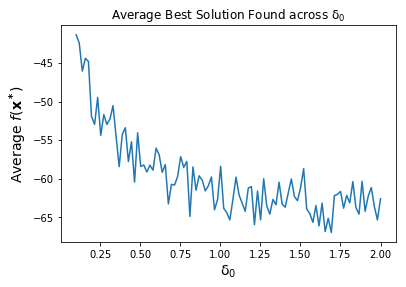

In [181]:
plt.plot(delta_var, best_x_delta)
plt.xlabel('δ$_0$', Fontsize=14)
plt.ylabel('Average $f(\mathbf{x^*})$', Fontsize=14)
plt.title('Average Best Solution Found across δ$_0$')
print("Average best solution:", np.average([arr[-1] for arr in fx_progress_list]))
print("Best solution found:", np.min([arr[-1] for arr in fx_progress_list]))

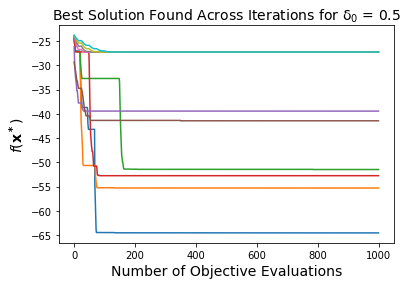

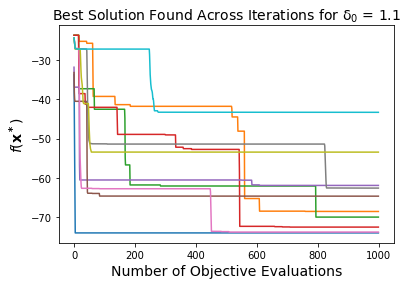

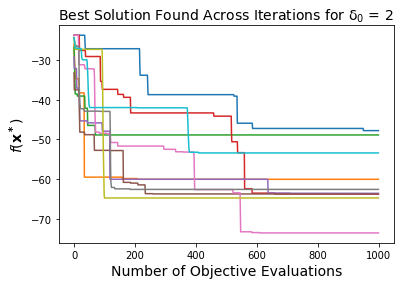

In [182]:
fx_progress_list = tabu_search(delta=0.1, delta_red=1.01)
plot_progress_multseed(fx_progress_list, 'Best Solution Found Across Iterations for δ$_0$ = 0.5')

fx_progress_list = tabu_search(delta=1.1, delta_red=1.01)
plot_progress_multseed(fx_progress_list, 'Best Solution Found Across Iterations for δ$_0$ = 1.1')

fx_progress_list = tabu_search(delta=2, delta_red=1.01)
plot_progress_multseed(fx_progress_list, 'Best Solution Found Across Iterations for δ$_0$ = 2')

## Investigation 3: Search Diversification

Best solution found: -73.80173089930379


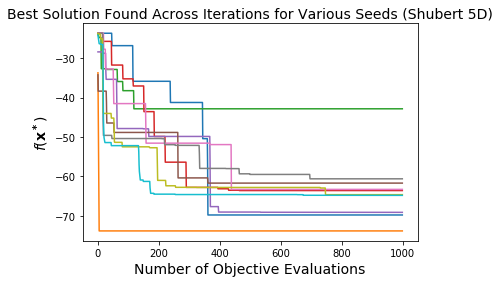

In [183]:
fx_progress_list = tabu_search(delta=1.5, delta_red=1.01, div_num=2)
print("Best solution found:", np.min([arr[-1] for arr in fx_progress_list]))
plot_progress_multseed(fx_progress_list, 'Best Solution Found Across Iterations for Various Seeds (Shubert 5D)')

Best solution found: -73.70290249671505


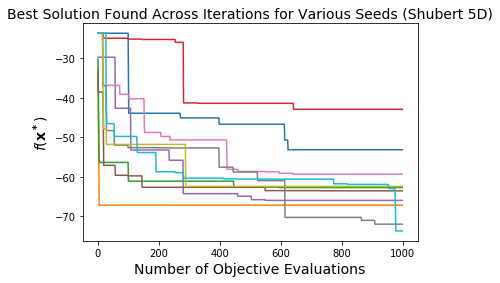

In [184]:
fx_progress_list = tabu_search(delta=1.5, delta_red=1.01, div_num=3)
print("Best solution found:", np.min([arr[-1] for arr in fx_progress_list]))
plot_progress_multseed(fx_progress_list, 'Best Solution Found Across Iterations for Various Seeds (Shubert 5D)')

In [185]:
div_var = np.linspace(1, 10, 10, dtype=int)
best_x_div = []

for div in div_var:
    fx_progress_list = tabu_search(delta=1.5, delta_red=1.01, div_num=div)
    progress_list = [arr[-1] for arr in fx_progress_list]
    avg = np.average(progress_list)
    best_x_div.append(avg)

Average best solution: -58.583907778454275
Best solution found: -70.32055588981522


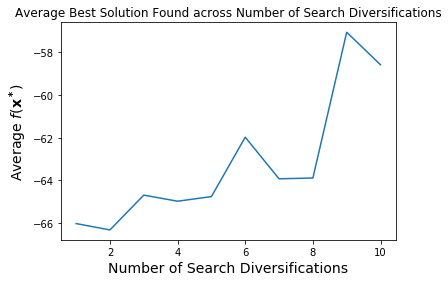

In [186]:
plt.plot(div_var, best_x_div)
plt.xlabel('Number of Search Diversifications', Fontsize=14)
plt.ylabel('Average $f(\mathbf{x^*})$', Fontsize=14)
plt.title('Average Best Solution Found across Number of Search Diversifications')
print("Average best solution:", np.average([arr[-1] for arr in fx_progress_list]))
print("Best solution found:", np.min([arr[-1] for arr in fx_progress_list]))

# Best Solution

Best solution found: -74.09114330767862


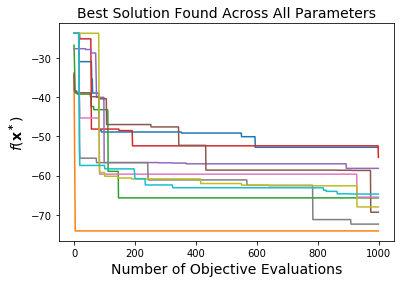

In [187]:
fx_progress_list = tabu_search(delta=1.4, delta_red=1.01, div_num=3)
plot_progress_multseed(fx_progress_list, 'Best Solution Found Across All Parameters')
print("Best solution found:", np.min([arr[-1] for arr in fx_progress_list]))

In [189]:
print(shubert([-1.12475469, -1.12475469, -1.12475469, -1.12475469, -1.12475469]))

-74.09114329323168
